In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# Загрузка данных
type_dict = {
    'Event': 'int64',
    'Count': 'int64',
    'Energy': 'float64'
}
df = pd.read_csv('../../1_MeV_Electron_Isotrop_nt_PhotonData.csv', skiprows=7, header=None, names=['Event', 'Count', 'Energy'], dtype = type_dict)
df.head(10)

,Event,Count,Energy
0,0,93,0.00000
1,0,0,3.21031
2,0,0,3.39136
3,0,0,3.38387
4,0,0,3.29429
5,0,0,3.35577
6,0,0,3.23005
7,0,0,3.35860
8,0,0,3.28478
9,0,0,3.21108


In [3]:
# Создаю датафрейм: "номеро события + общее кол-во зарегестрированных в нем фотонов"
events_info = df[df['Energy'] == 0].copy()
events_info = events_info[['Event', 'Count']].reset_index(drop=True)
events_info.rename(columns={'Event': 'EventNumber', 'Count': 'TotalCount'}, inplace=True)
events_info.head(10)

,EventNumber,TotalCount
0,0,93
1,1,83
2,2,88
3,3,87
4,4,74
5,5,101
6,6,77
7,7,75
8,8,86
9,9,74


In [4]:
# Датафрейм с энергиями всех зарегистрированных фотонов
energies = df[df['Energy'] != 0]['Energy']

Text(0.5, 0, 'Energy (MeV)')

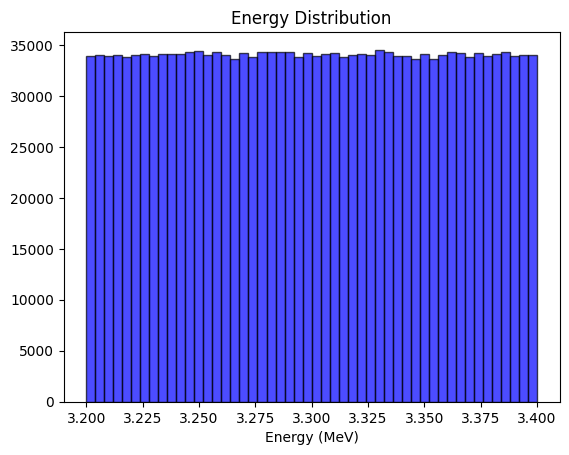

In [41]:
# Построение гистограммы зарегистрированных энергий
plt.hist(energies, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title("Energy Distribution")
plt.xlabel("Energy (MeV)")# Гауссиан

Амплитуда: 34098.6530445311, Центр: 3.3007936074082838 MeV, Сигма: 1.1161619481172544 MeV


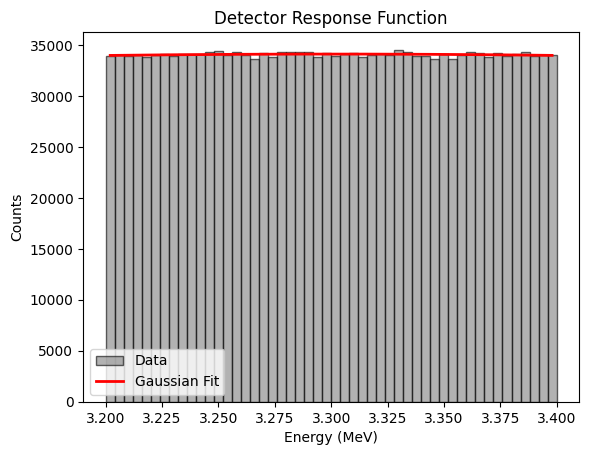

In [42]:
# Гауссиан
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Гистограмма данных
counts, bins = np.histogram(energies, bins=50)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Подгонка
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[max(counts), bin_centers[np.argmax(counts)], 1])

# Извлечение параметров
A_fit, mu_fit, sigma_fit = popt

# Результаты
print(f"Амплитуда: {A_fit}, Центр: {mu_fit} MeV, Сигма: {sigma_fit} MeV")

# Визуализация
plt.hist(energies, bins=50, alpha=0.6, color='gray', edgecolor='black', label='Data')
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 500)
plt.plot(x_fit, gaussian(x_fit, *popt), color='red', linewidth=2, label='Gaussian Fit')
plt.xlabel("Energy (MeV)")
plt.ylabel("Counts")
plt.title("Detector Response Function")
plt.legend()
plt.show()


In [43]:
from scipy.integrate import quad

# Интеграл полного распределения
total_integral, _ = quad(lambda x: gaussian(x, *popt), -np.inf, np.inf)

# Интеграл в пределах 3σ
energy_range = (mu_fit - 3 * sigma_fit, mu_fit + 3 * sigma_fit)
partial_integral, _ = quad(lambda x: gaussian(x, *popt), *energy_range)

# Эффективность
efficiency = partial_integral / total_integral
print(f"Интегральная эффективность: {efficiency:.2%}")


Интегральная эффективность: 99.73%


Ширина на полувысоте (FWHM): 28.25172021751118
Амплитуда: 14632.701193153793, Центр: 81.36407665487386, Сигма: 11.997400938185011


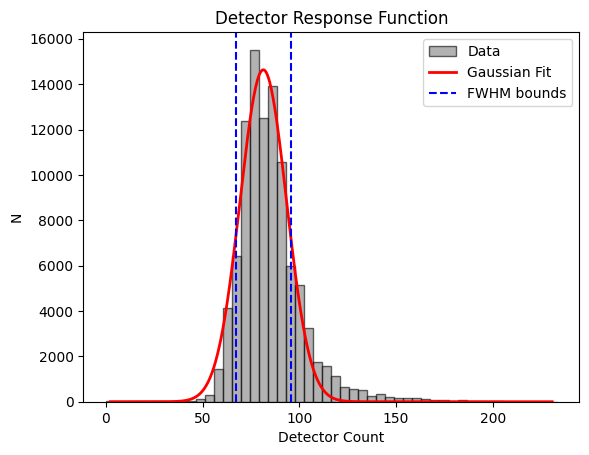

In [5]:
# Гауссиан
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Гистограмма данных
counts, bins = np.histogram(events_info['TotalCount'], bins=50)
bin_centers = (bins[:-1] + bins[1:]) / 2

# Подгонка
popt, pcov = curve_fit(gaussian, bin_centers, counts, p0=[max(counts), bin_centers[np.argmax(counts)], 1])

# Извлечение параметров
A_fit, mu_fit, sigma_fit = popt

# Расчет FWHM
fwhm = 2 * np.sqrt(2 * np.log(2)) * sigma_fit

# Результаты
print(f"Ширина на полувысоте (FWHM): {fwhm}")

# Результаты
print(f"Амплитуда: {A_fit}, Центр: {mu_fit}, Сигма: {sigma_fit}")

# Визуализация
plt.hist(events_info['TotalCount'], bins=50, alpha=0.6, color='gray', edgecolor='black', label='Data')
x_fit = np.linspace(bin_centers[0], bin_centers[-1], 500)
plt.plot(x_fit, gaussian(x_fit, *popt), color='red', linewidth=2, label='Gaussian Fit')
plt.xlabel("Detector Count")
plt.ylabel("N")
plt.title("Detector Response Function")
plt.axvline(mu_fit - fwhm / 2, color='blue', linestyle='--', label='FWHM bounds')
plt.axvline(mu_fit + fwhm / 2, color='blue', linestyle='--')
plt.legend()
plt.show()

In [10]:
print(f"Энергетическое разрешение детектора: {fwhm*3.3:.3f} эВ")

Энергетическое разрешение детектора: 93.231 эВ
